In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


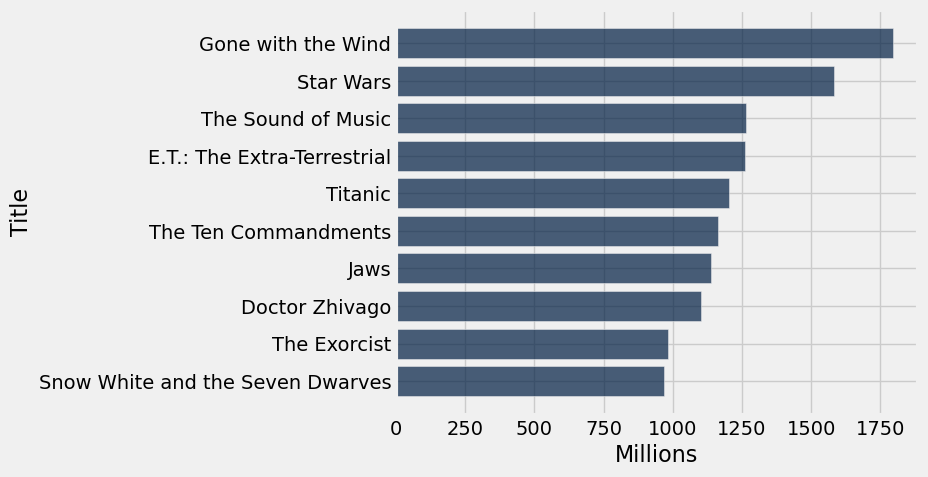

In [3]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross (Adjusted)')/1000000,3))

top_movies.take(np.arange(10)).barh('Title', 'Millions')
#top_movies

In [4]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [5]:
studio_distribution = studios.group('Studio')
# default behavior of .group will give you the count for each unique element in the categorical column

In [12]:
studio_distribution.show()

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [7]:
sum(studio_distribution.column('count'))
# 200 movies total, consistent with my original top_movies dataset

200

In [8]:
top_movies.num_rows

200

## Bar Charts ##

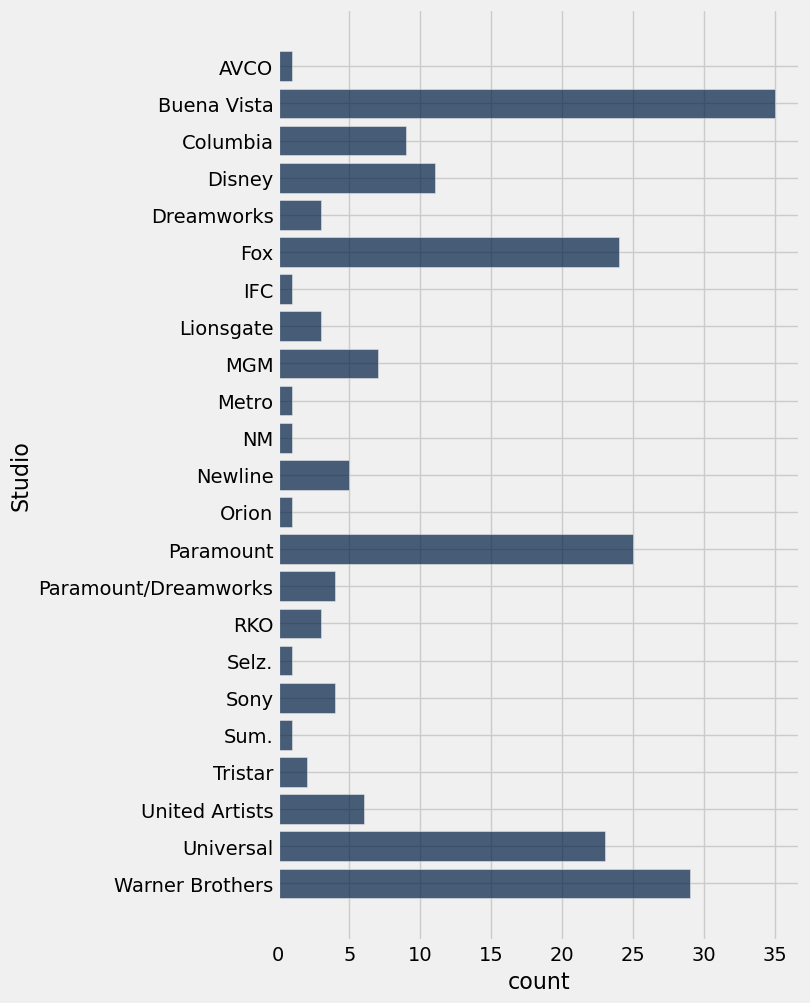

In [13]:
studio_distribution.barh('Studio')

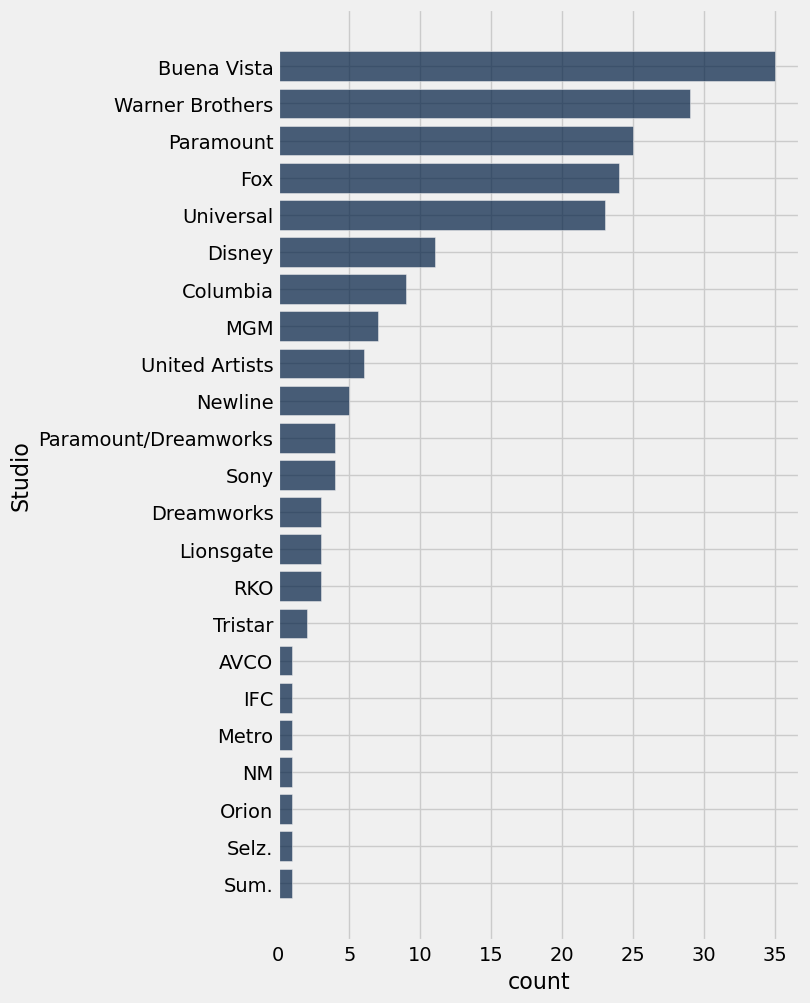

In [14]:
studio_distribution.sort('count', descending=True).barh('Studio')

In [16]:
studio_distribution.sort('count', descending=False)

Studio,count
AVCO,1
IFC,1
Metro,1
NM,1
Orion,1
Selz.,1
Sum.,1
Tristar,2
Dreamworks,3
Lionsgate,3


## Numerical Distribution ##

In [18]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


In [19]:
2022 - top_movies.column('Year') # extract column as array

array([ 83,  45,  57,  40,  25,  66,  47,  57,  49,  85,   7,  61,  42,
        63,  13,  39,  29,  23,  28,  49,  41,  55,  81,   7,  50,  28,
        58,  44,  10,  57,  14,  55,  63,  38,  18,  53,  52,  20,  26,
        32,  82,  59,  38,  58,  52,  49,  69,  16,  66,  80,  48,  33,
        77,  19,  19,  48,   6,  72,  18,  70,  58,  44,  18,  17,  37,
        20,  10,  23,  44,  40,  45,   5,   6,  61,  21,  67,  45,  60,
        47,  46,  76,  50,  21,  26,  25,  65,  13,  59,  62,  47,  52,
        38,   7,  20,  29,  30,  12,  32,   9,  76,  10,  19,  69,  68,
        25,  33,  21,   9,  15,   9,  31,  81,  22,  36,  11,  23,  21,
        15,   9,   6,  19,  15,  36, 101,  24,   5,  48,  69,  38,  31,
        17,  17,  15,  20,  29,  68,  14,  11,  18,  14,  27,   5,  32,
        40,  54,  34,   6,  55,   7,   8,  43,  24,  62,  40,  15,  37,
        27,   6,  32,  48,  12,  18,  22,  30,   6,  35,  20,   8,   7,
        26,   8,   7,  45,  41,  23,  13,  19,  18,  54,  22,  2

In [21]:
ages = 2022 - top_movies.column('Year')
# ages: what is this data type? ARRAY
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18,83
Star Wars,Fox,460998007,1583483200,1977,1583.48,45
The Sound of Music,Fox,158671368,1266072700,1965,1266.07,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09,40
Titanic,Paramount,658672302,1204368000,1997,1204.37,25
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59,66
Jaws,Universal,260000000,1138620700,1975,1138.62,47
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56,57
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01,85


In [23]:
2022 - 1937

85

In [32]:
top_movies
# can you find the oldest movie? 101 years old
top_movies.where('Age', are.above(100))
#min(top_movies.column('Year'))

#what about the newest movie? 5 years old
#top_movies.sort('Age')

# beauty and the beast (2017)
# wonder woman
# guardians of the galaxy


Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,408.214,101


## Binning ##

In [33]:
# newest: # beauty and the beast (2017)
# wonder woman
# guardians of the galaxy

# oldest:  The Four Horsemen of the Apocalypse	
min(ages), max(ages) 

(5, 101)

In [54]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101) # 7 bins to put our movie ages in
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 101])

In [55]:
binned_data = top_movies.bin('Age', bins = my_bins)
type(binned_data) #the data type?
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


In [ ]:
# There are 0 movies that are 0-4 years old, in our top_movies_2017 database.
# There are 0 movies that were released between 2018 - 2022 in our dataset.

# There are 25 movies that are between 5-9 years old in our top_movies_2017 dataset.
# There are 16 movies in the [10, 15) bin or 10-14 years old.

In [56]:
sum(binned_data.column('Age count'))
# Table.bin always produces n+1 rows
# we do indeed have a 101 year old movie, that last row representing 0 
# may suggest otherwise. please note, this is the default behavior of Table.bin
# where it produces an extra row at the end, always indicating our final upper bound

200

In [46]:
np.arange(0,126,25)

array([  0,  25,  50,  75, 100, 125])

In [48]:
five_bins = top_movies.bin('Age', bins = np.arange(0, 126, 25))
# what will np.arange(0,126,25) = (0,25,50,75,100, 125)
# how many bins? 5 bins
# our last row will always be empty, and it does not accurately represent the number of movies that are 
# that age or value
five_bins

bin,Age count
0,81
25,70
50,39
75,9
100,1
125,0


In [49]:
sum(five_bins.column('Age count'))

200

In [50]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))
# np.arange(0,60,25) = (0, 25, 50)
# how many bins? 2

bin,Age count
0,81
25,73
50,0


In [51]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
The Godfather,Paramount,134966411,701621600,1972,701.622,50
The Poseidon Adventure,Fox,84563118,488078400,1972,488.078,50
"What's Up, Doc?",Warner Brothers,66000000,345141200,1972,345.141,50


## Histograms ##

In [57]:
my_bins # 7 bins
# different sizes/intervals

array([  0,   5,  10,  15,  25,  40,  65, 101])

In [58]:
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


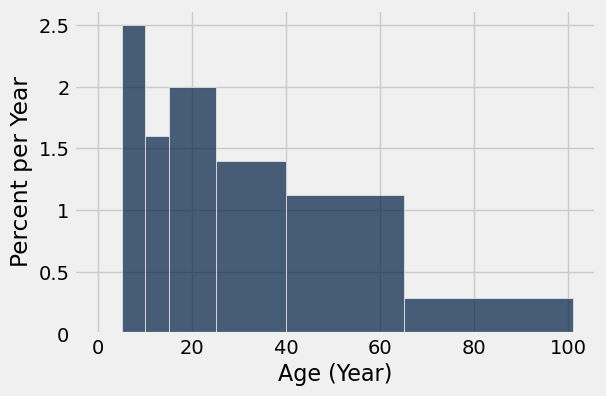

In [59]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

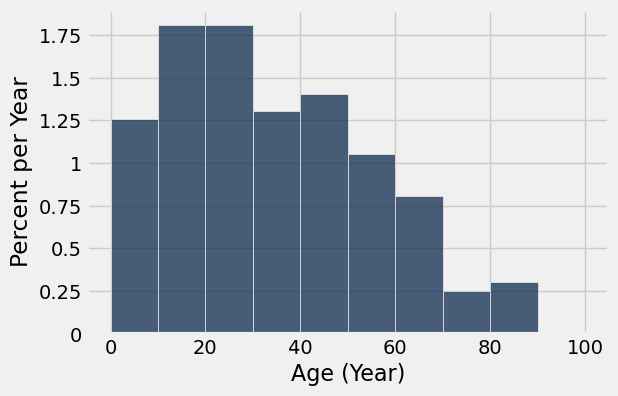

In [60]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

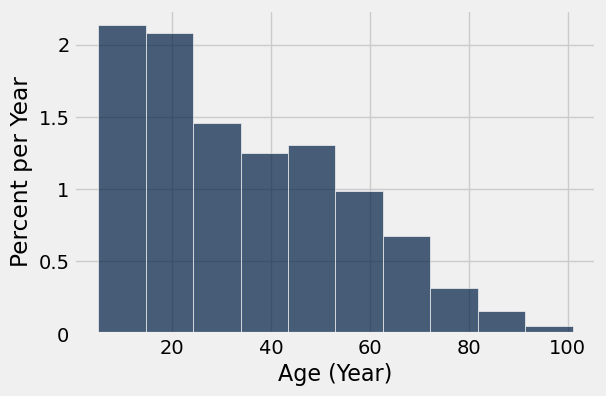

In [61]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [62]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [66]:
binned_data.column('Age count')/200 * 100

array([  0. ,  12.5,   8. ,  20. ,  21. ,  28. ,  10.5,   0. ])

In [63]:
binned_data

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,21,10.5
101,0,0


## Height ##

### Question: What is the height of the [40, 65] bin?

In [72]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent
# is given by area of bin

28.0

In [73]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [70]:
# Step 3: Area of rectangle = height * width
#         Area of rectangle = percent of movies in bin
#         --> height = percent / width
height = percent / width
height

1.12

In [71]:
#height x width = area = % of 200 total movies represented in this bin
1.12 * (65-40)

# 28% of all 200 movies in my top movies dataset is represented in [40,65) year old bin

28.000000000000004

### What are the heights of the rest of the bins?

In [75]:
binned_data.num_rows - 1 # 7 bins

7

In [76]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [74]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [77]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [78]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths # percent/widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [79]:
bin_lefts
#height of bin represents density of bin

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,25,12.5,5,2.5
10,16,8,5,1.6
15,40,20,10,2
25,42,21,15,1.4
40,56,28,25,1.12
65,21,10.5,36,0.291667


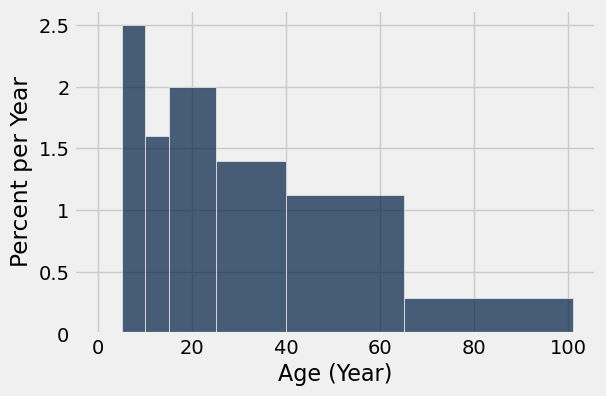

In [83]:
top_movies.hist(6, bins = my_bins, unit = 'Year')
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [81]:
# challenge to you:

# we know the percentage of movies represented in [40, 65] bin
.28*200
# what is the number of movies represented in [40, 65) bin?

56.00000000000001

In [82]:
help(Table.hist)

Help on function hist in module datascience.tables:

hist(self, *columns, overlay=True, bins=None, bin_column=None, unit=None, counts=None, group=None, rug=False, side_by_side=False, left_end=None, right_end=None, width=None, height=None, **vargs)
    Plots one histogram for each column in columns. If no column is
    specified, plot all columns. If interactive plots are enabled via ``Table#interactive_plots``,
    redirects plotting to plotly with ``Table#ihist``.
    
    Kwargs:
        overlay (bool): If True, plots 1 chart with all the histograms
            overlaid on top of each other (instead of the default behavior
            of one histogram for each column in the table). Also adds a
            legend that matches each bar color to its column.  Note that
            if the histograms are not overlaid, they are not forced to the
            same scale.
    
        bins (list or int): Lower bound for each bin in the
            histogram or number of bins. If None, bins wil